# Comentarios de la clase anterior
* El SD y CG solo funcionan para funciones objetivo de tipo parabolico.
* Una funcion objetivo como la de la figura siguiente no funciona
en SD o CG. De cualquier forma la iteracion
$$\theta^{(i+1)} = \theta^{(i)} - \alpha \nabla_\theta J(\theta) .$$
puede funcionar en cualquier caso, si el punto inicial esta bien posicionado. Ver figura siguiente.

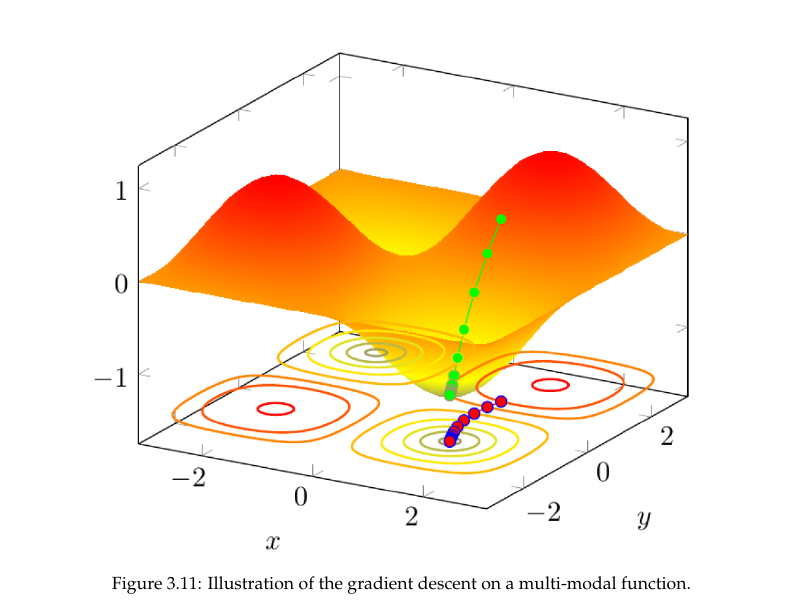

# SGD: Stochastic Gradient Descent (Desenso con gradiente estocastico)
## Historia:
Fue introducido Herber Robbins y Sutton Monro en 1951.

## Introduccion:(motivacion)
Pensemos en el siguiente problema:
* Tenemos una red neuronal tenga 10 capas ocultas, mas la de salida.
* Los datos de entrada son 10000 imagenes. Cada imagen es $100 \times 100$, en escala de gris (si es color RGB, toca multiplicar por 3).
* Cada capa tiene en promedio 100 neuronas. El total de neuronas usadas (incluyendo los datos de entrada es:
Los datos de entrada son $10000 \times 100 \times 100 = 10^8$
$$pesos= 10^8 \times 100^{10} = 10^{28}.$$

No se puede calcular el gradiente para todos estos datos.

La idea del gradiente estocastico es calcular el gradiente en **un solo punto** de los datos de entrada $m$

Como se calcula el gradiente estocastico solo en un punto.

Ejemplo de funcion de costo

$$J(x, A, y) = \frac12 \| A x - y \|^2 = \frac12 \sum_{i=1}^m
\left ( \sum_{j=1}^n ( a_{ij} x_j - y_j) \right)^2.$$

Vemos que podemos escribir

$$J(x, A, y) = \frac1m \sum_{i=1}^m C_i(x, A, y) .$$
con
$$C_i(x, A, y) = \frac{m}{2} \left ( \sum_{j=1}^n ( a_{ij} x_j - y_j   \right )^2 .$$

Lo que esto me esta mostrando es que la funcion de costo (global) se puede escribir como una suma de $m$ funciones de costo **locales**, $C_i(x, A, y)$.


La idea del SGD es calcular solo un termino de la suma global, o sea el gradiente sobre un termino o sobre una $i$ funcion de costo local. Cual $i$?. El $i$ es aleatorio.

El objeto de la clase de hoy es explicar como con **un solo** termino de la funcion de costo global, el metodo pueda converger.


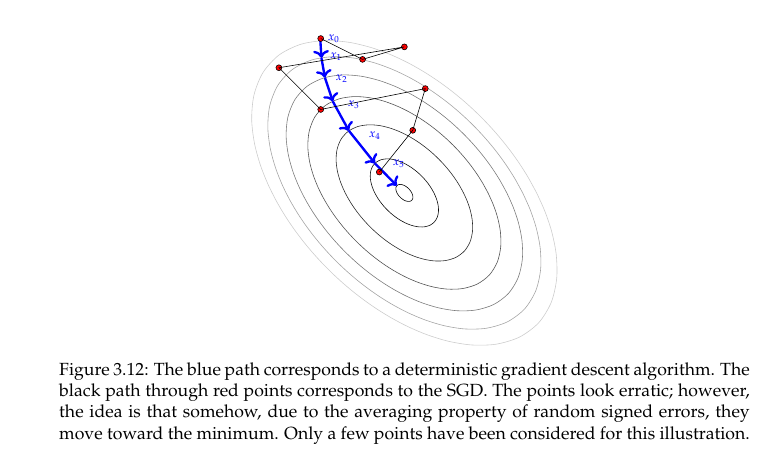

En la figura anterior, la linea azul corresponde al gradiente de descento $\theta^{(i+1)} = \theta^{(i)} - \alpha \nabla_{\theta}(\theta^{(i)}$. En la linea azul se suman todos los datos (terminos) de la funcion de costo. De otro lado la linea negra con puntos rojos, corresponde al descenso con un solo dato.

El metodo de gradiente normal se basa en el siguiente algoritmo que es simple pero inutil

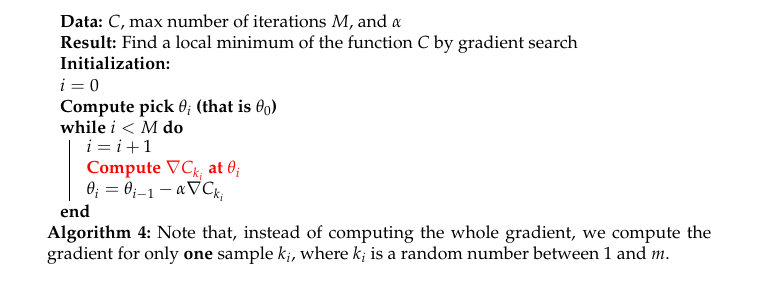

### Por que el algoritmo de SGC funciona?

Para esto me invente un ejemplo "juguetes"
Asumamos que tenemos 5 puntos que queremos ajustar a una linea de regresion lineal, pero que la linea pasa por el origen (no hay bias). Entonces los puntos son

$$(x_1, y_1), (x_2, y_2), (x_3, y_3), (x_4, y_4), (x_5,y_5) .$$
Como queremos ajustarlos a una linea que pasa por el origen


\begin{eqnarray}
y_1 &=& \theta x_1   \\
y_2 &=& \theta x_2   \\
y_3 &=& \theta x_3   \\
y_4 &=& \theta x_4   \\
y_5 &=& \theta x_5   
\end{eqnarray}
La funcion de costo de (minimos cuadrados) es


$$J(\theta) = \frac15 \sum_{i=1}^5 ( \theta x_i - y_i)^2 $$
La funcion de costo local es

$$C_i(\theta) = ( \theta x_i - y_i)^2 $$

Y

$$\nabla J(\theta) = \frac{dJ}{d \theta} = \frac{2}{5} \sum_{i=1}^5 ( \theta x_i - y_i) x_i .$$

El gradiente local

$$\nabla C_i(\theta) = \frac{d C_i}{d \theta} = 2 x_i( \theta x_i - y_i) .$$

Observe

$$\nabla J(\theta) = \frac15 \sum_{i=1}^5 \nabla C_i(\theta) .$$


Cada funcion local de costo $C_i(\theta)$ es una parabola

$$(\theta x_i - y_i)^2 = x_i^2 \theta^2 - 2 \theta x_i y_i + y_i^2 $$
Por ejemplo si escogemos los siguientes puntos

$$(-1, -0.5), (1,1) , (3,2) , (4,3) , (5, 6) $$
Calculemos las funciones locales de costo en cada punto.

\begin{eqnarray}
C_1(\theta) &=& (- \theta + 0.5)^2 \quad \text{minimo en} \quad \theta=0.5 \\
C_2(\theta) &=& ( \theta - 1)^2 \quad \text{minimo en} \quad \theta=1 \\
C_3(\theta) &=& ( 3 \theta - 2)^2 \quad \text{minimo en} \quad \theta=2/3 \approx 0.6\overline{7} \\
C_4(\theta) &=& ( 4 \theta - 3)^2 \quad \text{minimo en} \quad \theta=3/4=0.75 \\
C_5(\theta) &=& ( 5 \theta - 6)^2 \quad \text{minimo en} \quad \theta=6/5=1.2 \\
\end{eqnarray}

La funcion de costo global es

$$J(\theta) = \frac15 \left [ (-\theta + 0.5)^2 + (\theta-1)^2 + (3 \theta -2)^2 + (4 \theta - 3)^2 + (5 \theta -6)^2  \right ] $$




Los gradientes de las funciones local y global son

\begin{eqnarray}
\nabla C_1(\theta) &=& -2( -\theta + 0.5) \\
\nabla C_2(\theta) &=& 2( \theta - 1) \\
\nabla C_3(\theta) &=& 6( 3 \theta - 2) \\
\nabla C_4(\theta) &=& 8( 4 \theta - 3) \\
\nabla C_5(\theta) &=& 10( 5 \theta - 6) \\
\nabla J(\theta) &=& \frac15 \left [ -2(-\theta + 0.5) + 2(\theta -1) + 6 ( 3 \theta -2) + 8 (4 \theta-3) + 10 (5 \theta -6)   \right ]
\end{eqnarray}

La grafica siguiente ilustrata las parabolas con sus minimos y el minimo de la suma.

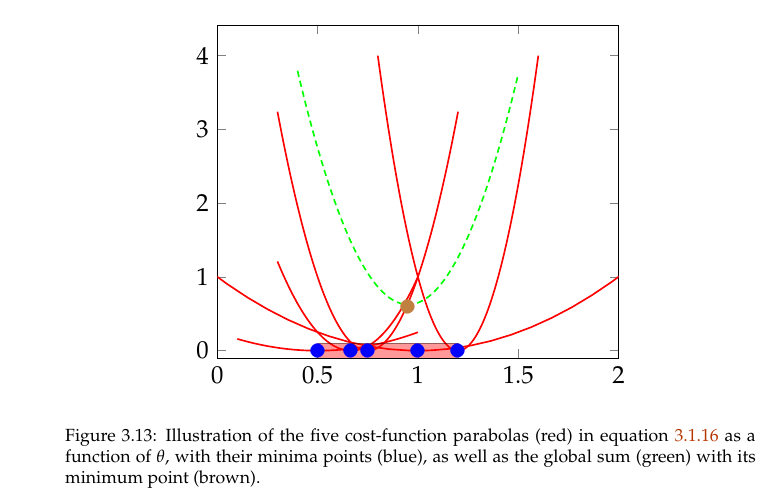

La zona delimitada por los puntos de minima, se llama **zona de confusion** (region of confusion).  Que pasa por fuera de la zona de confusion. Existen dos posibilidades:

1. A la izquierda de la zona de confusion. Podemos asegurar sin temor a equivocarnos que **todas** las pendientes (gradientes locales) son **negativas**.  
Negar el gradiente es apuntar al punto cafe (que es el minimo buscado). Flecha a la derecha.

2. A la derecha de la zona de confusion. Podemos asegurar sin temor a equivocarnos que **todas** las pendientes (gradientes locales) son **positivas**.
Negar el gradiente implica flecha a la izquierda. Y nos estamos moviendo en el sentido correcto.

3. Si estamos dentro de la zona de confusion, no se sabe.

usando el paquete
[dl2](https://pypi.org/project/d2l/)
generamos la grafica a continuacion.

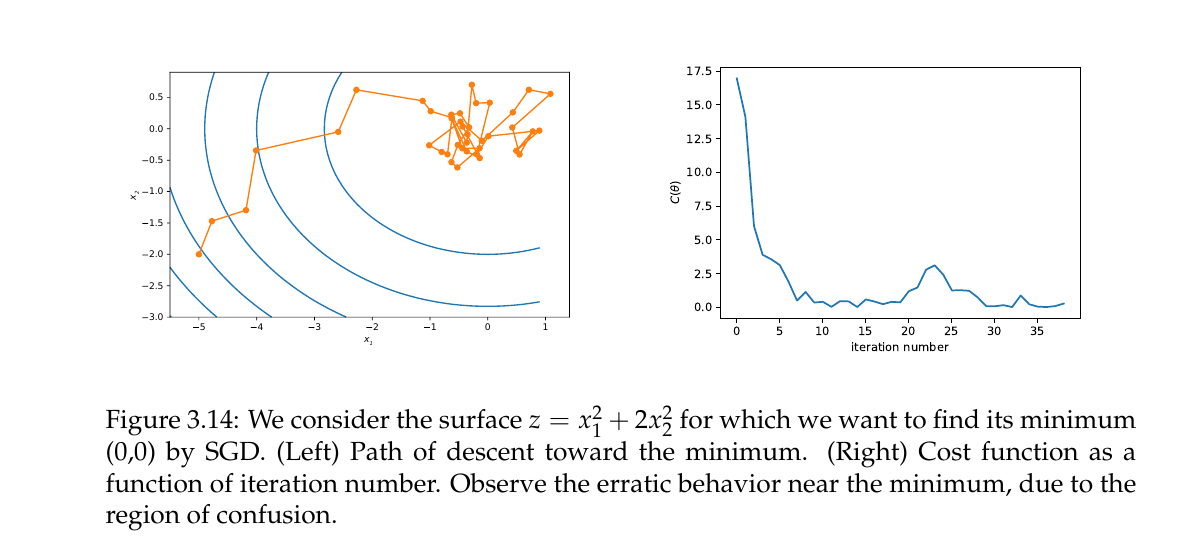

A partir de la discusion anterior formulamos las siguientes 3 preguntas.

1. Que pasa cuando estamos dentro de la zona de confusion?
2. Como podemos calcular la incertidumbre del metodo?
3. Como estimar el tamanho correcto de $\alpha$.

La primera pregunta ya se discution. No sabemos si nos estamos moviendo en la direccion correcta o no.
La segunda. Usamos estadistica.

$$\mathbb{E}[ \nabla C_i(\theta)] = \frac1m \sum_{i=1}^m \nabla C_i(\theta) = \nabla J(\theta) \tag{1} .$$
En la ecuacion (1) se uso una distribucion uniforme. Todos los eventos tiene la misma probabilidad. Si se conoce a priori la distribucion de los gradientes locales se puede cambiar esta formula por

$$\mathbb{E}[ \nabla C_i(\theta)] = \sum_{i=1}^m p_i \nabla C_i(\theta) = \nabla J(\theta) \tag{1} .$$


El tamanho de la region de confusion, de alguna forma, se puede calcular con la varianza.

$$\mathbb{V} [ \nabla C_i(\theta)] = \frac{1}{m-1} \sum_{i=1}^m \| \nabla C_i(\theta) - \nabla J(\theta) \|^2 $$
La division por $m-1$ en vez de $m$ es para que no sea un

[bias estimator](https://en.wikipedia.org/wiki/Bias_of_an_estimator)
Estimador sesgado.

La tercera pregunta la resuelvo en el curso de deep learning.
Unas reglas heuristicas.
* Resolver la ecuacion $\varphi'(\theta_0) = \nabla J( \theta_0 - \alpha \nabla J(\theta_0) \cdot \nabla J(\theta_0) = 0$
Esta ecuacion es la SD y en la practica no tiene sentido.

* Trate 3 valores diferentes de $\alpha$, y haga una interpolacion a una parabolda para encontrar el minimo.

* Backtracking search: Escoge un $\alpha$ grande (1?) y comienza a disminuirlo. En Octave (Matlab) esta tecnica tiene el nombre de **so_step_armijo** basada en un articulo de Larry Armijo.

* Prueba y error: Empieze bajo $0.001$ y se va multiplicando por 10. $0.001, 0.01, 0.1, 1.$?
Estas reglas son:

La technica que usa **todos** ($m$) los datos se llama
**batch Gradient Descent**. La que usa un solo datos
SGD (Stochastic Gradient Descent). Pero hay un termino medio.


Si en vez de escojer un dato (cada vez) se escogen un montoncito (un valde) entonces se suaviza la curva de descenso, se disminuye la zona de confusion y se incrementa las probailidades de exito, pero aumenta el costo.
Por ejemplo si se tienen $m$ datos, se pueden partir en $k$ montones. Si $k=1$, es batch gradient descent, si $k=m$ es el SDG, pero la idea es escoger $1 < k < m$ (ejor mas cerca a 1 que a $m$. Si $k>1$ esta cerca a $1$ se le llama
**minibatch gradient descent**.


El algoritmo de minibatch gradient descent se muestra a continuacion.








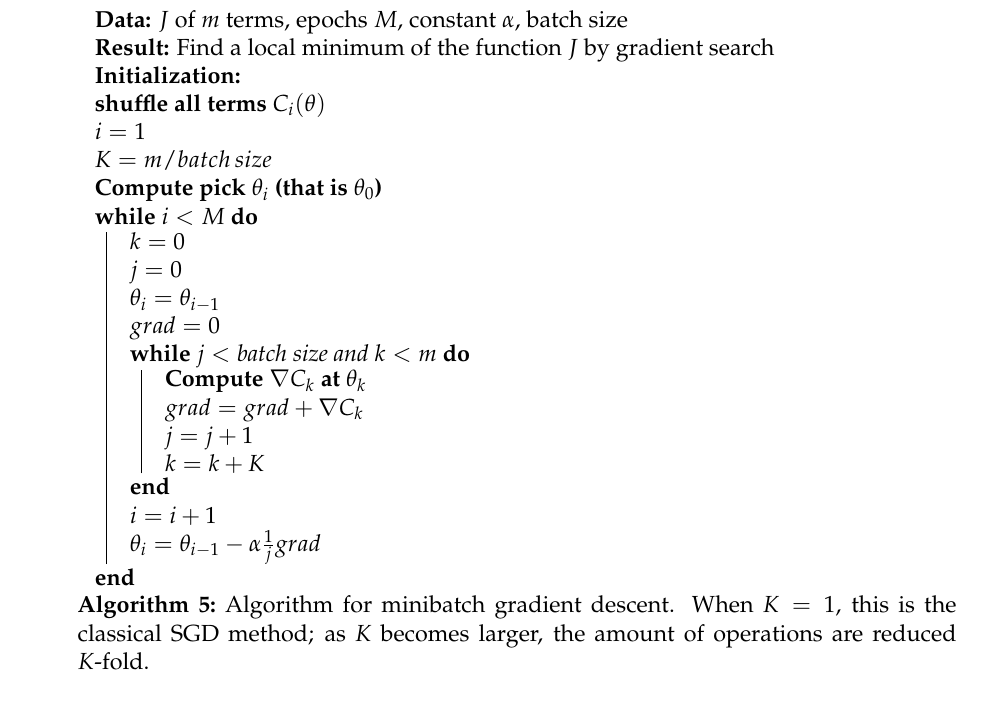

Hay metodos modernos que no cubrimos aca. Menciono solo
L-BFGS.  En el curso de Deep Learning yo ensenho los siguientes metodos para acelerar la convergencia.

* Poliak (momento, Ruso)
* Nesterov (alumno de Poliak
* AdaGrad
* AdaDelta
* Adam
* RMSProp

# Proxima clase: Mas dimensiones (casa: area, numero de cuartos, estrato, etc.)